In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Import Data

In [311]:
pca_data = pd.read_csv('./data/PowerCompanyAssessmentData.csv', encoding='unicode_escape')
df = pca_data

In [312]:
df.head()

,age,sex,max_boulder,max_sport,exp,trainexp,country,state,rock,season,...,ancamp_score,aercamp_score,rep1_score,cont_score,pullup_score,pushup_score,ohpr_score,ohpl_score,dl_score,bmi_score
0,43,Female,<V3,5.10c/d,>10 years,<1 year,United States,KY,Sandstone,7-9 months,...,41.0,62.0,31.0,16.0,2.0,6.0,NaN,NaN,NaN,25.1
1,16,Female,V6,5.12c/d,7-8 years,7-8 years,US,Montana,Limestone,4-6 months,...,NaN,NaN,120.0,28.0,15.0,30.0,0.12,0.12,0.88,21.5
2,19,Male,V9,5.13c/d,>10 years,7-8 years,Usa,Georgia,Sandstone,4-6 months,...,114.0,301.0,117.0,54.0,18.0,70.0,NaN,NaN,NaN,22.2
3,34,Male,V8,5.12a/b,>10 years,5-6 years,USA,North Carolina,Granite,4-6 months,...,NaN,NaN,NaN,47.0,15.0,35.0,NaN,NaN,NaN,25.1
4,30,Female,V8,5.12a/b,7-8 years,3-4 years,US,Washington,Granite,4-6 months,...,95.0,210.0,NaN,NaN,5.0,7.0,0.18,0.18,1.02,21.6


### Cleaning

#### Column removal

In [313]:
df.columns

Index(['age', 'sex', 'max_boulder', 'max_sport', 'exp', 'trainexp', 'country',
       'state', 'rock', 'season', 'days', 'height', 'weight', 'span', 'pullup',
       'pushup', 'continuous', 'maxhang', 'weightedpull', 'repeaters1',
       'longcamp', 'shortcamp', 'ohpr', 'ohll', 'dl', 'sportgrade',
       'bouldergrade', 'powl', 'powr', 'Unnamed: 29', 'hang_score',
       'pull_score', 'powl_score', 'powr_score', 'ancamp_score',
       'aercamp_score', 'rep1_score', 'cont_score', 'pullup_score',
       'pushup_score', 'ohpr_score', 'ohpl_score', 'dl_score', 'bmi_score'],
      dtype='object')

In [314]:
to_drop = [
    'state',
    'season',
    'days',
    'longcamp',
    'shortcamp',
    'powl',
    'powr',
    'Unnamed: 29',
    'powl_score',
    'powr_score',
    'ancamp_score',
    'aercamp_score',
    'ohpl_score',
    'ohpr',
    'ohll',
    'rep1_score',
    'cont_score',
    'continuous',
    'repeaters1',
    'dl_score',
    'ohpr_score',
    'pushup_score',
    'pullup_score',
    'pull_score',
    'hang_score'
    ]
df = df.drop(to_drop,axis =1)

In [315]:
df.columns

Index(['age', 'sex', 'max_boulder', 'max_sport', 'exp', 'trainexp', 'country',
       'rock', 'height', 'weight', 'span', 'pullup', 'pushup', 'maxhang',
       'weightedpull', 'dl', 'sportgrade', 'bouldergrade', 'bmi_score'],
      dtype='object')

#### Datatypes

In [316]:
df.dtypes

age               int64
sex              object
max_boulder      object
max_sport        object
exp              object
trainexp         object
country          object
rock             object
height          float64
weight          float64
span            float64
pullup          float64
pushup          float64
maxhang         float64
weightedpull    float64
dl              float64
sportgrade       object
bouldergrade     object
bmi_score       float64
dtype: object

In [317]:
df['country'] = df['country'].astype(str)

#### Metric conversion

Data set in lbs, I prefer Kilos

In [318]:
def lbs_to_kg(lbs):
    return lbs * 0.453592

lbs_cols = ['weightedpull','dl','weight','maxhang']
df[lbs_cols] = df[lbs_cols].apply(lbs_to_kg).round(2)

Dataset in inches, I prefer feet

In [319]:
def inches_to_feet(inches):
    return inches/12

inch_cols = ['height','span']
df[inch_cols] = df[inch_cols].apply(inches_to_feet).round(2)

#### Clean max_boulder


In [320]:
# clean max_boulder
df = df[df['max_boulder'] != '<V3']
df['max_boulder'] = df['max_boulder'].str.split("V").str[1]
df = df[df['max_boulder'].notnull()]
df['max_boulder'] = df['max_boulder'].apply(lambda x: '0'+ x if x[0] != '1' else x)
df['max_boulder'] = df['max_boulder'].astype(float)

#### Clean exp + train exp

,age,sex,max_boulder,max_sport,exp,trainexp,country,rock,height,weight,span,pullup,pushup,maxhang,weightedpull,dl,sportgrade,bouldergrade,bmi_score,trained_>10_years


#### Clean country

In [ ]:
# clean country
df['country'] = df['country'].astype(str)
df['country'] = df['country'].str.upper()
df['country'] = df['country'].apply(lambda x: x.strip())
country_dict = {
    'US':'USA', 
    'UNITED STATES':'USA',
    'UNITES STATES':'USA',
    'UNITED STATES OF AMERICA':'USA',
    'THE UNITED STATES OF AMERICA':'USA',
    'MURICA':'USA',
    'USA USA USA USA USA':'USA',
    'UNITED STATS':'USA',
    'CANADA':'CANADA',
    'MALAWI':'MALAWI',
    'FINLAND': 'FINLAND',
    'GERMANY': 'GERMANY',
    'DEUTSCHLAND': 'GERMANY',
    'AUSTRALIA':'AUSTRALIA',
    'SWEDEN':'SWEDEN',
    'ITALY':'ITALY',
    'ITALIA':'ITALY',
    'IRELAND':'IRELAND',
    'NORGE':'NORWAY',
    'NORWAY':'NORWAY',
    'UNITED KINGDOM':'UK',
    'UK':'UK',
    'INDIA':'INDIA',
    'SPAIN':'SPAIN',
    'COSTA RICA':'COSTA RICA',
    'AUSTRIA':'AUSTRIA',
    'COLOMBIA':'COLOMBIA',
    'TAIWAN':'TAIWAN',
    'ST HELENA':'ST HELENA',
    'ALLEMAGNE':'GERMANY',
    'MÉXICO':'MEXICO',
    'THE NETHERLANDS':'NETHERLANDS',
    'PORTUGAL':'PORTUGAL',
    'SOUTH AFRICA':'SOUTH AFRICA',

    }
df['country'] = df['country'].map(country_dict)

#### Clean/Bin age

In [ ]:
# clean age
bins = [10,20,30,40,50,60]
df['age_bin'] = pd.cut(df['age'],bins)

In [ ]:





# clean training experience

## Exploration

In [ ]:
df.head()

,age,sex,max_boulder,max_sport,exp,trainexp,country,rock,height,weight,span,pullup,pushup,maxhang,weightedpull,dl,sportgrade,bouldergrade,bmi_score,age_bin
1,16,Female,6.0,5.12c/d,7-8 years,7-8 years,USA,Limestone,5.33,56.70,5.33,15.0,30.0,4.54,9.07,49.90,NaN,NaN,21.5,"(10, 20]"
2,19,Male,9.0,5.13c/d,>10 years,7-8 years,NaN,Sandstone,5.83,70.31,6.17,18.0,70.0,15.88,38.56,NaN,NaN,NaN,22.2,"(10, 20]"
3,34,Male,8.0,5.12a/b,>10 years,5-6 years,NaN,Granite,5.67,74.84,6.00,15.0,35.0,22.68,31.75,NaN,NaN,NaN,25.1,"(30, 40]"
4,30,Female,8.0,5.12a/b,7-8 years,3-4 years,USA,Granite,5.67,64.41,5.83,5.0,7.0,15.88,11.34,65.77,NaN,NaN,21.6,"(20, 30]"
6,31,Female,7.0,5.12c/d,9-10 years,3-4 years,USA,Limestone,6.12,64.86,6.33,8.0,7.0,11.34,11.34,NaN,NaN,NaN,18.6,"(30, 40]"


Text(0.5, 0, 'age')

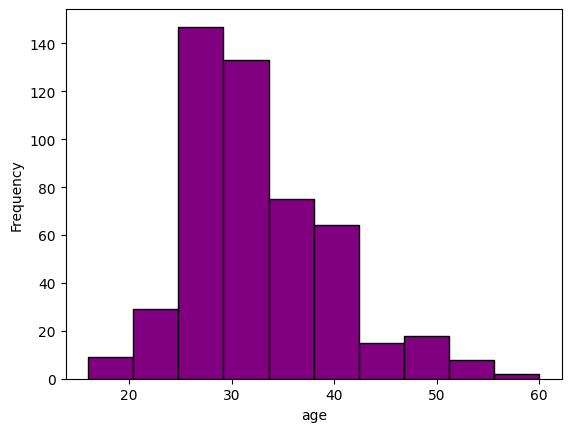

In [ ]:
df['age'].plot(kind ='hist',color ='purple', edgecolor ='black')
plt.xlabel('age')

We see a normal distrution of Ages for this climbing dataset. I would have expected a more exponential distribution given the popularity of the sport amongst younger ages

<AxesSubplot: >

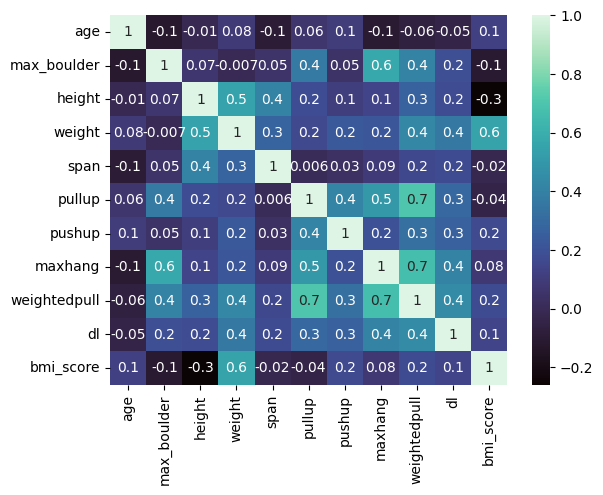

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
corr = numeric_df.corr()
sns.heatmap(corr,annot = True, fmt = '.1g', cmap = 'mako')